In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
k = 2
a = np.sin(k)
b = np.cos(k)

In [3]:
A = -1
B = 1

In [4]:
def phi(i, x):
    if i < 1:
        return 0
    return np.power(x, i-1)*(1-x*x)

def ddphi(i, x):
    if i < 1:
        return 0
    elif i == 1:
        return -2
    elif i == 2:
        return -6*x 
    return (i-1)*(i-2)*x**(i-3)-i*(i+1)*x**(i-1) # -(i+1)*np.power(x, i-2)*(1+(2+i)*x*x)

def q(x):
    return (1+b*x*x)

def f(x):
    return -1
    
def y(x):
    res = phi(0, x)
    for i in range(len(ais)):
        res += ais[i] * phi(i + 1, x)
    return round(res, 3)

# y(n, x) = phi(0, x) + a1*phi(1, x) + ... + an*phi(n, x)
# ddy(n, x) = ddphi(0, x) + a1*ddphi(1, x) + ... + an*ddphi(n, x)
# psi(x, a1, ..., an) = a*ddy(n, x) + q(x)*y(n, x) - f(x)

Коллокации:

In [5]:
def k(i, x):
    return a * ddphi(i, x) + q(x) * phi(i, x)

def c(x):
    return f(x) - a * ddphi(0, x) - q(x) * phi(0, x) 


first 10 of ai coeffs:
 [0.964, 0.0, -0.116, 0.0, 0.02, 0.0, -0.001, 0.0, 0.0, -0.0]

some points of grid func:
(x, y(x))
 [(-1.0, 0.0), (-0.98, 0.034), (-0.96, 0.069), (-0.939, 0.104), (-0.919, 0.137), (-0.899, 0.169), (-0.879, 0.202), (-0.859, 0.233), (-0.838, 0.266), (-0.818, 0.296)] ...
... [(0.818, 0.296), (0.838, 0.266), (0.859, 0.233), (0.879, 0.202), (0.899, 0.169), (0.919, 0.137), (0.939, 0.104), (0.96, 0.069), (0.98, 0.034), (1.0, 0.0)]


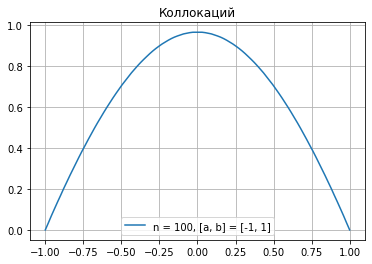

In [6]:
n = 100
xs = [round(x, 3) for x in np.linspace(A, B, n)]

syst = []
vec = []

for x in xs:
    r = []
    for i in range(n):
        r.append(k(i+1, x))
    syst.append(r)
    vec.append(c(x))

ais = np.linalg.solve(syst, vec)
ys = [round(y(x), 3) for x in xs]
ais = [round(a, 3) for a in ais]

grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n(x, y(x))\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Коллокаций")
plt.legend()
plt.grid()
plt.show()

Галеркина:

In [7]:
def k(i, j):
    res = a * integrate.quad(lambda x: phi(i, x) * ddphi(j, x), A, B)[0] + \
            integrate.quad(lambda x: q(x) * phi(i, x) * phi(j, x), A, B)[0]
    return res

def c(i):
    res = -(integrate.quad(lambda x: phi(i, x) * ddphi(0, x), A, B)[0] + \
            integrate.quad(lambda x: q(x) * phi(i, x) * phi(0, x), A, B)[0] + \
            integrate.quad(lambda x: phi(i, x), A, B)[0])
    return res

first 10 of ai coeffs:
 [0.964, -0.0, -0.116, -0.0, 0.02, -0.0, -0.001, -0.0, -0.0, -0.0]

some points of grid func:
(x, y(x))
 [(-1.0, 0.0), (-0.98, 0.034), (-0.96, 0.069), (-0.939, 0.104), (-0.919, 0.137), (-0.899, 0.169), (-0.879, 0.202), (-0.859, 0.233), (-0.838, 0.266), (-0.818, 0.296)] ...
... [(0.818, 0.296), (0.838, 0.266), (0.859, 0.233), (0.879, 0.202), (0.899, 0.169), (0.919, 0.137), (0.939, 0.104), (0.96, 0.069), (0.98, 0.034), (1.0, 0.0)]


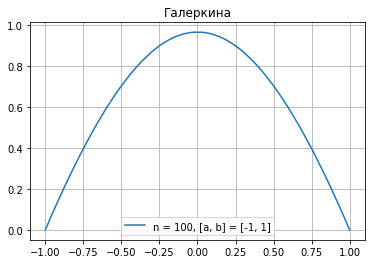

In [8]:
syst = []
vec = []

for i in range(1, n + 1):
    r = []
    for j in range(1, n + 1):
        r.append(k(i, j))
    syst.append(r)
    vec.append(c(i))

ais = np.linalg.solve(syst, vec)

ais = np.linalg.solve(syst, vec)
ys = [round(y(x), 3) for x in xs]
ais = [round(a, 3) for a in ais]

grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n(x, y(x))\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Галеркина")
plt.legend()
plt.grid()
plt.show()

Наименьших квадратов (дискретный):

In [9]:
N = 2*n

xs = [round(x, 3) for x in np.linspace(A, B, N)]

In [10]:
def k(i, j):
    res = 0
    for x in xs:
        res += (a * ddphi(i, x) + q(x)*phi(i, x)) * \
                (a * ddphi(j, x) + q(x) * phi(j, x))
    res *= 2 
    return res

def c(i):
    res = 0
    for x in xs:
        res += (a * ddphi(i, x) + q(x)*phi(i, x)) * \
                (a * ddphi(0, x) + q(x) * phi(0, x) + 1)
    res *= -2 
    return res

first 10 of ai coeffs:
 [0.964, -0.0, -0.116, 0.0, 0.02, -0.0, -0.001, 0.0, 0.0, -0.003]

some points of grid func:
(x, y(x))
 [(-1.0, 0.0), (-0.99, 0.017), (-0.98, 0.034), (-0.97, 0.052), (-0.96, 0.069), (-0.95, 0.085), (-0.94, 0.102), (-0.93, 0.119), (-0.92, 0.135), (-0.91, 0.152)] ...
... [(0.91, 0.152), (0.92, 0.135), (0.93, 0.119), (0.94, 0.102), (0.95, 0.085), (0.96, 0.069), (0.97, 0.052), (0.98, 0.034), (0.99, 0.017), (1.0, 0.0)]


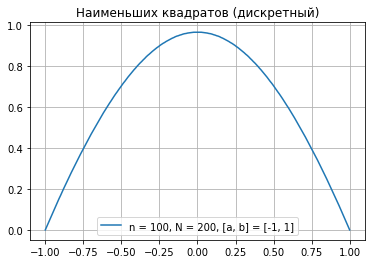

In [11]:
syst = []
vec = []

for i in range(1, n + 1):
    r = []
    for j in range(1, n + 1):
        r.append(k(i, j))
    syst.append(r)
    vec.append(c(i))

ais = np.linalg.solve(syst, vec)

ais = np.linalg.solve(syst, vec)
ys = [round(y(x), 3) for x in xs]
ais = [round(a, 3) for a in ais]

grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n(x, y(x))\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, N = {N}, [a, b] = [{A}, {B}]")
plt.title("Наименьших квадратов (дискретный)")
plt.legend()
plt.grid()
plt.show()

Наименьших квадратов (интегральный):

In [12]:
n = 100
xs = [round(x, 3) for x in np.linspace(A, B, n)]

In [13]:
def k(i, j):
    res = integrate.quad(
        lambda x: \
            (ddphi(j, x) + q(x) * phi(j, x)) * \
            (ddphi(i, x) + q(x) * phi(i, x)),
        A, B)[0]
    return res

def c(i):
    res = integrate.quad(
        lambda x: f(x) * ( ddphi(i, x) + q(x)*phi(i, x)),
        A, B)[0]
    return res

first 10 of ai coeffs:
 [0.821, 0.0, -0.089, -0.0, 0.015, -0.0, -0.001, -0.0, 0.0, -0.0]

some points of grid func:
(x, y(x))
 [(-1.0, 0.0), (-0.98, 0.03), (-0.96, 0.059), (-0.939, 0.089), (-0.919, 0.118), (-0.899, 0.146), (-0.879, 0.173), (-0.859, 0.2), (-0.838, 0.228), (-0.818, 0.254)] ...
... [(0.818, 0.254), (0.838, 0.228), (0.859, 0.2), (0.879, 0.173), (0.899, 0.146), (0.919, 0.118), (0.939, 0.089), (0.96, 0.059), (0.98, 0.03), (1.0, 0.0)]


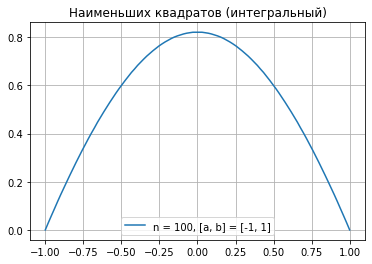

In [14]:
syst = []
vec = []

for i in range(1, n+1):
    r = []
    for j in range(1, n+1):
        r.append(k(i, j))
    syst.append(r)
    vec.append(c(i))

ais = np.linalg.solve(syst, vec)

ais = np.linalg.solve(syst, vec)
ys = [round(y(x), 3) for x in xs]
ais = [round(a, 3) for a in ais]

grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n(x, y(x))\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Наименьших квадратов (интегральный)")
plt.legend()
plt.grid()
plt.show()